# （一）machine learning terminology

# 分类器（Classifier）

一段程序或一个函数将无标签实例映射到类别，则成称这段程序或这个函数为分类器

### 混淆矩阵（Confusion Matrix）

用来观察分类器的性能，其中矩阵列标表示实例的预测类别，行标表示实例的真是类别.下图就是一个二分类（binary classification）的混淆矩阵.表示正确预测男性42人，正确预测女性32人，18人被误分类为男性，8人被误分类为女性.

![pic1](pic1.png)

### 准确率 （accuracy（error rate））

准确率表示为：$正确预测实例数/实例总数$.上例中准确率是$(42+32)/(42+32+8+18)=0.72$


#### 准确性悖论（Accuracy paradox）

我们假设有如下一个混淆矩阵,它只会预测female，我们可以计算其准确率$(50+0)/(0+50+50+0)=0.5$

![pic2](pic2.png)

又比如我们有一个垃圾邮件识别分类器，其混淆矩阵如下,所示，其准确率为$(91+4)/(91+4+1+4)=0.95$：![pic3](pic3.png)

然后我们有另一个垃圾邮件识别分类器，其混淆矩阵如下所示，其准确率也是$(95+0)/(95+0+0+5)=0.95$。（两者用同样的实例数据）

![pic4](pic4.png)
虽然准确率都是0.95但是后者没有分类垃圾邮件的能力,因此分类器的好坏单看准确率是不够的，这就是准确性驳论。

### 精确率（Precision）和召回率（Recall）

![pic5](pic5.png)

TP：True Positive TN：True Negative FP：False Positive FN：False Negtive（翻译过来就是真阳性，真阴性，假阳性，假阴性）还是英文好记

$$Accuracy：(TN+TP)/(TN+TP+FN+FP)$$
$$Precision:(TP)/(TP+FP)$$
$$Recall:(TP)/(TP+FN)（也是True\quad positive\quad rate）$$
$$True\quad negtive\quad rate:(TN)/(TN+FP)$$

### 多分类的混淆矩阵和准确率，精确率，召回率

![pic6](pic6.png)

$Acurracy：$$$\frac{\sum_i M_{ii}}{\sum_{ij} Mij}$$

$Percision_i：$ $$\frac{M_{ii}}{\sum_j M_{ji}}$$

$Recall_i：$ $$\frac{M_{ii}}{\sum_j M_{ij}}$$

上面这个例子中：$$Accuracy=(6+6+8)/(6+2+1+6+1+1+8)=0.8$$  $$percision_{dog}=6/(6+1+1)=0.75$$ 
                $$percision_{cat}=6/(6+1+2)=0.67$$ $$percision_{snake}=8/(0+0+8)=1 $$

$$recall_{dog}=6/(6+2+0)=0.75$$ $$recall_{cat}=6/(6+1+0)=0.86$$  $$recall_{snake}=8/(1+1+8)=0.8$$

### Roc曲线

$横轴:False positive rate(FPR)表示预测的正例中负例占所有负例的比例：FPR=(FP)/(FP+TN)$
$纵轴:True positive rate(TPR)表示预测的正例中正例占所有正例的比例：TPR=(TP)/(TP+FN)$
$True negtive rate(TNR)表示预测的负例中负例占所有负例比例：TNR=(TN)/(TN+FP)$
$$所以有TNR=1-FPR$$

假设采用逻辑回归分类器，其给出针对每个实例为正类的概率，那么通过设定一个阈值$\theta$，概率大于等于$\theta$的为正类，小于$\theta$的为负类.对应的就可以算出一组(FPR,TPR),在平面中得到对应坐标点.随着阈值的逐渐减小，越来越多的实例被划分为正类，但是这些正类中同样也掺杂着真正的负实例，即TPR和FPR会同时增大(前者因为FN减少，后者因为FP增加).阈值最大时，对应坐标点为(0,0),阈值最小时，对应坐标点(1,1).

![pic7](pic7.png)

AUC(Area under Curve)：Roc曲线下的面积，介于0.1和1之间。**Auc作为数值可以直观的评价分类器的好坏**，值越大越好。AUC就是从所有正样本中随机选择一个样本，从所有负样本中随机选择一个样本，然后根据你的学习器对两个随机样本进行预测，把正样本预测为正例的概率$p_1$，把负样本预测为正例的概率$p_2$，$p_1>p_2$的概率就等于AUC.所以AUC反映的是分类器对样本的排序能力.根据这个解释，如果我们完全随机的对样本分类，那么AUC应该接近0.5.

### 举个例子

现在我们有一个二分类器，20个样本，然后分类结果如下所示.

In [14]:
import pandas as pd
#a=pd.Series([1,2,3,5],index=["a","b","c","d"])
#print(a)
Class=pd.Series([1,1,-1,1,1,1,-1,-1,1,-1,1,-1,1,-1,-1,-1,1,-1,1,-1])
Score=pd.Series([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1])
dt={"class":Class,
    "score":Score
   }
data=pd.DataFrame(dt)
print(data)

    class  score
0       1  0.900
1       1  0.800
2      -1  0.700
3       1  0.600
4       1  0.550
5       1  0.540
6      -1  0.530
7      -1  0.520
8       1  0.510
9      -1  0.505
10      1  0.400
11     -1  0.390
12      1  0.380
13     -1  0.370
14     -1  0.360
15     -1  0.350
16      1  0.340
17     -1  0.330
18      1  0.300
19     -1  0.100


class表示其真实类别，score表示模型判别其为正类的概率

In [28]:
def FPR(data,threshold):
    FP=0
    TN=0
    for i in range(len(data)):
        #print(data.ix[i])
        #print(data["class"])
        if (data["score"][i]>=threshold)&(data["class"][i]==-1):
            FP+=1
        if (data["score"][i]<threshold)&(data["class"][i]==-1):
            TN+=1
    return FP/(FP+TN)
def TPR(data,threshold):
    TP=0
    FN=0
    for i in range(len(data)):
        if (data["score"][i]>=threshold)&(data["class"][i]==1):
            TP+=1
        if (data["score"][i]<threshold)&(data["class"][i]==1):
            FN+=1
    return TP/(TP+FN)
            
print("min FPR:",FPR(data,0.9))
print("min TPR:",TPR(data,0.9))
print("max FPR:",FPR(data,0.1))
print("max TPR:",TPR(data,0.1))

min FPR: 0.0
min TPR: 0.1
max FPR: 1.0
max TPR: 1.0


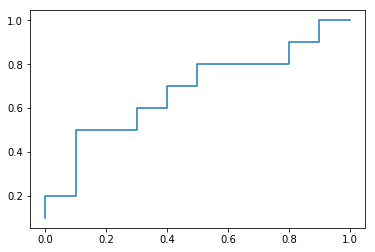

In [34]:
from matplotlib import pyplot as pl
ROC_FPR=[]
ROC_TPR=[]
for threshold in data["score"]: 
    ROC_FPR.append(FPR(data,threshold))
    ROC_TPR.append(TPR(data,threshold))
pl.plot(ROC_FPR,ROC_TPR)
pl.xlabel("FPR")
pl.ylabel()
pl.show()

机器学习分为：监督学习（Supervised learning），无监督学习（Unsupervised learning），半监督学习（Semi-supervised learning），强化学习（Reinforcement learning）